<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/125_expval_var.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(random_variables_notebook)=
# Variabili casuali 

In questo capitolo, introduciamo le variabili casuali, un concetto che semplifica la notazione e amplia la nostra capacità di quantificare l'incertezza e riassumere i risultati degli esperimenti.

In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

from aquarel import load_theme
theme = load_theme("minimal_light")
theme.apply()
import matplotlib.style as style 
style.use("tableau-colorblind10")

```{admonition} Definizione
Dato un esperimento con spazio campione $ S $, una variabile casuale (v.c.) è una funzione che mappa lo spazio campione $S$ nei numeri reali $\mathbb{R}$. 
```

In altre parole, la variabile casuale è una regola che mappa gli eventi elementari a dei numeri. In sintesi, una variabile casuale è una funzione matematica che rappresenta la misura di una quantità associata a un evento casuale, ovvero un valore numerico che descrive il risultato dell'esperimento casuale. 

È comune, ma non obbligatorio, denotare le variabili aleatorie con lettere maiuscole. 

````{prf:example}
:label: rv-expl-1
Consideriamo lo spazio campione prodotto dal lancio di una moneta. Gli eventi elementari sono "testa" e "croce". Possiamo definire una variabile casuale che assegna il valore 1 all'evento elementare "testa" e il valore 0 all'evento elementare "croce". Quindi, la variabile casuale in questo caso è una funzione che associa gli eventi elementari "testa" e "croce" ai numeri 1 e 0, rispettivamente. 
```````

## Valore atteso

Spesso è utile sintetizzare la distribuzione di una variabile casuale tramite indicatori caratteristici.  Questi indicatori permettono di cogliere le caratteristiche principali della distribuzione, come la posizione (cioè il baricentro) e la variabilità (cioè la dispersione attorno ad un centro). In questo modo, si può avere una descrizione sintetica della distribuzione di probabilità della variabile casuale. In questo capitolo introdurremo i concetti di valore atteso e di varianza di una variabile casule. 

Quando vogliamo conoscere il comportamento tipico di una variabile casuale spesso vogliamo sapere qual è il suo "valore tipico". La nozione di "valore tipico", tuttavia, è ambigua. Infatti, essa può essere definita in almeno tre modi diversi:

-   la *media* (somma dei valori divisa per il numero dei valori),
-   la *mediana* (il valore centrale della distribuzione, quando la variabile è ordinata in senso crescente o decrescente),
-   la *moda* (il valore che ricorre più spesso).

Per esempio, la media di $\{3, 1, 4, 1, 5\}$ è $\frac{3+1+4+1+5}{5} = 2.8$, la mediana è $3$ e la moda è $1$. Tuttavia, la teoria delle probabilità si occupa di variabili casuali piuttosto che di sequenze di numeri. Diventa dunque necessario precisare che cosa intendiamo per "valore tipico" quando facciamo riferimento alle variabili casuali. Giungiamo così alla seguente definizione.

```{admonition} Definizione
Sia $Y$ è una variabile casuale discreta che assume i valori $y_1, \dots, y_n$ con distribuzione $P(Y = y_i) = p(y_i)$. Per definizione il *valore atteso* di $Y$, $\mathbb{E}(Y)$, è

$$
\mathbb{E}(Y) = \sum_{i=1}^n y_i \cdot p(y_i).
$$ (eq-expval-discr)
```

A parole: il valore atteso (o speranza matematica, o aspettazione, o valor medio) di una variabile casuale è definito come la somma di tutti i valori che la variabile casuale può prendere, ciascuno pesato dalla probabilità con cui il valore è preso.

````{prf:example}
:label: rv-expl-2
Calcoliamo il valore atteso della variabile casuale $Y$ corrispondente al lancio di una moneta equilibrata (testa: *Y* = 1; croce: *Y* = 0).
````

$$
\mathbb{E}(Y) = \sum_{i=1}^{2} y_i \cdot P(y_i) = 0 \cdot \frac{1}{5} + 1 \cdot \frac{1}{5} = 0.5.
$$

````{prf:example}
:label: rv-expl-3
Calcoliamo il valore atteso della variabile casuale $X$ corrispondente alla somma dei punti ottenuti dal lancio di due dadi equilibrati a sei facce. 
````

Abbiamo visto nel capitolo {ref}`intro_prob_notebook` che $X$ può assumere i valori [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] con distribuzione di massa di probabilità pari a [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]. Applicando l'eq. {eq}`eq-expval-discr` otteniamo:

$$
\mathbb{E}(X) = \sum_{i=1}^{11} x_i \cdot P(x_i) = 2 \cdot \frac{1}{36} + 3 \cdot \frac{2}{36} + \dots + 12 \cdot \frac{1}{36} = 7.0.
$$

Svolgiamo ora l'esercizio in Python. 

Definisco i valori della variabile casuale $X$ e li trasformiamo in un array NumPy:

In [6]:
x = np.array(list(range(2, 13)))
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Per trovare la distribuzione di massa della variabile $X$ ripeto qui il codice che abbiamo usato nel capitolo {ref}`intro_prob_notebook`.

In [7]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]

px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

px = np.array(px)
px

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

Calcolo ora il valore atteso della $X$ usando l'eq. {eq}`eq-expval-discr`:

In [8]:
ex = np.sum(x * px)
ex.round(3)

7.0

In alternativa, posso usare le funzioni del modulo `rv_discrete` della libreria `stats`:

In [9]:
x = np.arange(2, 13)
px = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])
X = stats.rv_discrete(values=(x, px))

Una volta definito l'oggetto $X$ con `rv_discrete()`, il valore atteso viene ritornato dalla funzione `expect()`:

In [10]:
x_ev = X.expect()
round(x_ev, 3)

7.0

### Interpretazione

Il valore atteso corrisponde alla media aritmetica di un grande numero di realizzazioni indipendenti della variabile casuale.

Per fare un esempio, ritorniamo all'esempio precedente relativo al lancio di due dadi bilanciati a sei facce nel quale $X$ rappresenta la "somma dei due dadi". Per interpretare il valore atteso, simuliamo un grande numero di realizzazioni indipendenti della $X$ mediante la funzione `random.choice()` della libreria NumPy. Tale funzione prende come argomenti i valori della variabile casuale, il numero di ripetizioni indipedenti (qui 1,000,000) e la distribuzione di massa di probabilità:

In [11]:
x_samples = np.random.choice(x, size=1000000, p=px)

L'istruzione `np.random.choice(x, size=1000000, p=px)` utilizza la libreria NumPy per generare un array di 1.000.000 di elementi (parametro `size`), scelti casualmente dall'array `x` con le probabilità specificate nell'array `px`. In particolare, `x` è l'array di cui si vuole effettuare una scelta casuale e `px` è un array che contiene le probabilità associate ad ogni elemento di `x`. 

Come ci aspettavamo, per un grande numero di realizzazioni indipendenti della $X$, la media aritmetica approssima il valore atteso:

In [12]:
np.mean(x_samples).round(3)

6.997

### Proprietà del valore atteso

La proprietà più importante del valore atteso è la linearità: il valore atteso di una somma di variabili casuali è uguale alla somma dei lori rispettivi valori attesi:

$$
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y).
$$ (eq-prop-expval-linearity)

L'eq. {eq}`eq-prop-expval-linearity` sembra ragionevole quando $X$ e $Y$ sono indipendenti, ma è anche vera quando $X$ e $Y$ sono associati. Abbiamo anche che

$$
\mathbb{E}(cY) = c \mathbb{E}(Y).
$$ (eq-prop-expval-const)

L'eq. {eq}`eq-prop-expval-const` ci dice che possiamo estrarre una costante dall'operatore di valore atteso. Tale proprietà si estende a qualunque numero di variabili casuali. Infine, se due variabili casuali $X$ e $Y$ sono indipendenti, abbiamo che

$$
\mathbb{E}(X Y) = \mathbb{E}(X) \mathbb{E}(Y). 
$$ (eq-expval-prod-ind-rv)

La media aritmetica $\textstyle {\bar  {X}}={\frac  {X_{1}+\ldots +X_{n}}{n}}$ di $n$ variabili casuali indipendenti aventi la medesima distribuzione di media $\mu$ ha valore atteso 

$$
\mathbb{E}(\bar{X}) = \frac{1}{n} \mathbb{E}(X_1)+ \dots \mathbb{E}(X_n) = \frac{1}{n} n \mathbb{E}(X) = \mu.
$$

````{prf:example}
:label: rv-expl-4

Consideriamo il seguente esperimento casuale. Sia $Y$ il numero che si ottiene dal lancio di un dado equilibrato a sei facce e $Y$ il numero di teste prodotto dal lancio di una moneta equilibrata (0 oppure 1). Troviamo il valore atteso di $X+Y$.
````

Per risolvere il problema iniziamo a costruire lo spazio campione dell'esperimento casuale.

| $x /\ y$ |   1    |   2    |   3    |   4    |   5    |   6    |
|:--------------------:|:------:|:------:|:------:|:------:|:------:|:------:|
|          0           | (0, 1) | (0, 2) | (0, 3) | (0, 4) | (0, 5) | (0, 6) |
|          1           | (1, 1) | (1, 2) | (1, 3) | (1, 4) | (1, 5) | (1, 6) |

ovvero

| $x /\ y$ |  1  |  2  |  3  |  4  |  5  |  6  |
|:--------------------:|:---:|:---:|:---:|:---:|:---:|:---:|
|          0           |  1  |  2  |  3  |  4  |  5  |  6  |
|          1           |  2  |  3  |  4  |  5  |  6  |  7  |

Il risultato del lancio del dado è indipendente dal risultato del lancio della moneta. Pertanto, ciascun evento elementare dello spazio campione avrà la stessa probabilità di verificarsi, ovvero $P(\omega) = \frac{1}{12}$. Il valore atteso di $X+Y$ è dunque uguale a:

$$
\mathbb{E}(X+Y) = 1 \cdot \frac{1}{12} + 2 \cdot \frac{1}{12} + \dots + 7 \cdot \frac{1}{12} = 4.0.
$$

Si ottiene lo stesso risultato usando l'eq. {eq}`eq-prop-expval-linearity`:

$$
\mathbb{E}(X+Y) = \mathbb{E}(X) + E(Y) = 3.5 + 0.5 = 4.0.
$$

Svolgiamo ora l'esercizio in Python.

In [13]:
coin = range(0, 2)
die = range(1, 7)

sample = [(c, d) for c in coin for d in die]
list(sample)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6)]

In [14]:
px = []
for i in range(1, 8):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))
    print(f"P(X + Y = {i}) = {len(event)} / {len(sample)}")


P(X + Y = 1) = 1 / 12
P(X + Y = 2) = 2 / 12
P(X + Y = 3) = 2 / 12
P(X + Y = 4) = 2 / 12
P(X + Y = 5) = 2 / 12
P(X + Y = 6) = 2 / 12
P(X + Y = 7) = 1 / 12


In [15]:
x = np.arange(1, 8)
sum(x * px)

4.0

````{prf:example}
:label: rv-expl-5

Consideriamo le variabili casuali $X$ e $Y$ definite nel caso del lancio di tre monete equilibrate, dove $X$ conta il numero delle teste nei tre lanci e $Y$ conta il numero delle teste al primo lancio. Si calcoli il valore atteso di $Z = X \cdot Y$.
````

La distribuzione di probabilità congiunta $P(X, Y)$ è fornita nella tabella seguente.

| $x /\ y$ |  0  |  1  | $p(Y)$ |
|:--------------------:|:---:|:---:|:------:|
|          0           | 1/8 |  0  |  1/8   |
|          1           | 2/8 | 1/8 |  3/8   |
|          2           | 1/8 | 2/8 |  3/8   |
|          3           |  0  | 1/8 |  1/8   |
|        $p(y)$        | 4/8 | 4/8 |  1.0   |

Il calcolo del valore atteso di $XY$ si riduce a

$$
\mathbb{E}(Z) = 1 \cdot \frac{1}{8} + 2 \cdot \frac{2}{8} + 3 \cdot \frac{1}{8} = 1.0.
$$

Si noti che le variabili casuali $Y$ e $Y$ non sono indipendenti. Dunque non possiamo usare l'eq. {eq}`eq-expval-prod-ind-rv`. Infatti, il valore atteso di $X$ è

$$
\mathbb{E}(X) = 1 \cdot \frac{3}{8} + 2 \cdot \frac{3}{8} + 3 \cdot \frac{1}{8} = 1.5
$$

e il valore atteso di $Y$ è

$$
\mathbb{E}(Y) = 0 \cdot \frac{4}{8} + 1 \cdot \frac{4}{8} = 0.5.
$$

Perciò

$$
1.5 \cdot 0.5 \neq 1.0.
$$

Svolgiamo l'esercizio in Python.

In [16]:
r = range(0, 2)
sample = [(i, j, w) for i in r for j in r for w in r]

for i in range(0, 4):
    event = [toss for toss in sample if sum(toss) * toss[0] == i]
    print(f"P(Z = {i}) : {len(event)} / {len(sample)}")

P(Z = 0) : 4 / 8
P(Z = 1) : 1 / 8
P(Z = 2) : 2 / 8
P(Z = 3) : 1 / 8


In [17]:
z = np.array([0, 1, 2, 3])
pz = np.array([4/8, 1/8, 2/8, 1/8])
sum(z * pz)

1.0

### Variabili casuali continue

Nel caso di una variabile casuale continua $Y$ il valore atteso diventa:

$$
\mathbb{E}(Y) = \int_{-\infty}^{+\infty} y p(y) \,\operatorname{d}\!y.
$$ (eq-def-ev-rv-cont)

Anche in questo caso il valore atteso è una media ponderata della $y$, nella quale ciascun possibile valore $y$ è ponderato per il corrispondente valore della densità $p(y)$. Possiamo leggere l'integrale pensando che $y$ rappresenti l'ampiezza delle barre infinitamente strette di un istogramma, con la densità $p(y)$ che corrisponde all'altezza di tali barre e la notazione $\int_{-\infty}^{+\infty}$ che corrisponde ad una somma.[^018_expval_var-1]

[^018_expval_var-1]: Per il significato della notazione di integrale, si veda l'appendice {ref}`calculus-appendix`.

#### Moda

Un'altra misura di tendenza centrale delle variabili casuali continue è la moda. La moda di $Y$ individua il valore $y$ più plausibile, ovvero il valore $y$ che massimizza la funzione di densità $p(y)$:

$$
Mo(Y) = \text{argmax}_y p(y).
$$ (eq-def-mode)

```{note}
La notazione $\text{argmax}_y p(y)$ significa: il valore $y$ tale per cui la funzione $p(y)$ assume il suo valore massimo.
```

## Varianza

La seconda più importante proprietà di una variabile casuale, dopo che conosciamo il suo valore atteso, è la *varianza*.

```{admonition} Definizione
Se $Y$ è una variabile casuale discreta con distribuzione $p(y)$, per definizione la varianza di $Y$, $\mathbb{V}(Y)$, è

$$
\mathbb{V}(Y) = \mathbb{E}\Big[\big(Y - \mathbb{E}(Y)\big)^2\Big].
$$ (eq-def-var-rv)
```

A parole: la varianza è la deviazione media quadratica della variabile dalla sua media.[^018_expval_var-2] Se denotiamo $\mathbb{E}(Y) = \mu$, la varianza $\mathbb{V}(Y)$ diventa il valore atteso di $(Y - \mu)^2$.

[^018_expval_var-2]: Data una variabile casuale $Y$ con valore atteso $\mathbb{E}(Y)$, le "distanze" tra i valori di $Y$ e il valore atteso $\mathbb{E}(Y)$ definiscono la variabile casuale $Y - \mathbb{E}(Y)$ chiamata *scarto*, oppure *deviazione* oppure *variabile casuale centrata*. La variabile $Y - \mathbb{E}(Y)$ equivale ad una traslazione di sistema di riferimento che porta il valore atteso nell'origine degli assi. Si può dimostrare facilmente che il valore atteso della variabile scarto $Y - \mathbb{E}(Y)$ vale zero, dunque la media di tale variabile non può essere usata per quantificare la "dispersione" dei valori di $Y$ relativamente al suo valore medio. Occorre rendere sempre positivi i valori di $Y - \mathbb{E}(Y)$ e tale risultato viene ottenuto considerando la variabile casuale $\left(Y - \mathbb{E}(Y)\right)^2$.


````{prf:example}
:label: rv-expl-6

Posta $S$ uguale alla somma dei punti ottenuti nel lancio di due dadi equilibrati, si calcoli la varianza di $S$.
````

La variabile casuale $S$ ha la seguente distribuzione di probabilità:

|    $s$     |       2        |       3        |       4        |       5        |       6        |       7        |       8        |       9        |       10       |       11       |       12       |
|:----------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|
| $P(S = s)$ | $\frac{1}{36}$ | $\frac{2}{36}$ | $\frac{3}{36}$ | $\frac{4}{36}$ | $\frac{5}{36}$ | $\frac{6}{36}$ | $\frac{5}{36}$ | $\frac{4}{36}$ | $\frac{3}{36}$ | $\frac{2}{36}$ | $\frac{1}{36}$ |

Essendo $\mathbb{E}(S) = 7$, la varianza diventa

$$
\begin{align}
\mathbb{V}(S) &= \sum \left(s - \mathbb{E}(S)\right)^2 \cdot P(s) \notag\\
&= (2 - 7)^2 \cdot \frac{1}{36} + (3-7)^2 \cdot \frac{3}{36} + \dots + (12 - 7)^2 \cdot \frac{1}{36} \notag\\
&= 5.8333.\notag
\end{align}
$$

Svolgiamo l'esercizio in Python.

In [4]:
x = np.arange(2, 13)
px = np.array(
    [
        1 / 36,
        2 / 36,
        3 / 36,
        4 / 36,
        5 / 36,
        6 / 36,
        5 / 36,
        4 / 36,
        3 / 36,
        2 / 36,
        1 / 36,
    ]
)
X = stats.rv_discrete(values=(x, px))
ex = X.expect()
ex

6.999999999999998

Applichiamo l'eq. {eq}`eq-def-var-rv`:

In [5]:
((x - ex) ** 2 * px).sum()

5.833333333333333

Usiamo la funzione `var()` di `rv_discrete`:

In [6]:
X.var()

5.833333333333364

### Formula alternativa per la varianza

C'è un modo più semplice per calcolare la varianza:

$$
\begin{align}
\mathbb{E}\Big[\big(Y - \mathbb{E}(Y)\big)^2\Big] &= \mathbb{E}\big(Y^2 - 2Y\mathbb{E}(Y) + \mathbb{E}(Y)^2\big)\notag\\
&= \mathbb{E}(Y^2) - 2\mathbb{E}(Y)\mathbb{E}(Y) + \mathbb{E}(Y)^2,
\end{align}
$$

dato che $\mathbb{E}(Y)$ è una costante. Pertanto

$$
\mathbb{V}(Y) = \mathbb{E}(Y^2) - \big(\mathbb{E}(Y) \big)^2.
$$ (eq-def-alt-var-rv)

A parole: la varianza è la media dei quadrati meno il quadrato della media della variabile.


````{prf:example}
:label: rv-expl-7

Consideriamo la variabile casuale $Y$ che corrisponde al numero di teste che si osservano nel lancio di una moneta truccata con probabilità di testa uguale a 0.8. Si trovi la varianza di $Y$.
````

Il valore atteso di $Y$ è

$$
\mathbb{E}(Y) = 0 \cdot 0.2 + 1 \cdot 0.8 = 0.8.
$$

Usando la formula tradizionale della varianza otteniamo:

$$
\mathbb{V}(Y) = (0 - 0.8)^2 \cdot 0.2 + (1 - 0.8)^2 \cdot 0.8 = 0.16.
$$

Lo stesso risultato si trova con la formula alternativa della varianza. Il valore atteso di $Y^2$ è

$$
\mathbb{E}(Y^2) = 0^2 \cdot 0.2 + 1^2 \cdot 0.8 = 0.8.
$$

e la varianza diventa

$$
\mathbb{V}(Y) = \mathbb{E}(Y^2) - \big(\mathbb{E}(Y) \big)^2 = 0.8 - 0.8^2 = 0.16.
$$

Svolgiamo l'esercizio in Python:

In [21]:
y = np.array([0, 1])
py = np.array([0.2, 0.8])

sum(y**2 * py) - (sum(y * py)) ** 2

0.15999999999999992

### Proprietà

**Segno della varianza.** La varianza di una variabile aleatoria non è mai negativa, ed è zero solamente quando la variabile assume  un solo valore.

**Invarianza per traslazione.** La varianza è invariante per traslazione, che lascia fisse le distanze dalla media, e cambia quadraticamente per riscalamento:
  
$$
\mathbb{V}(a + bX) = b^2\mathbb{V}(X).
$$

*Dimostrazione.* Iniziamo a scrivere

$$
(aX+b)-{\mathbb{E}}[aX+b]=aX+b-a{\mathbb{E}}[X]-b=a(X-{\mathbb  {E}}[X]).
$$

Quindi

$$
\sigma _{{aX+b}}^{2}={\mathbb{E}}[a^{2}(X-{\mathbb  {E}}[X])^{2}]=a^{2}\sigma _{X}^{2}.
$$


Esaminiamo una dimostrazione numerica.

In [22]:
x = np.array([2, 1, 4, 7])
y = 100 + 2 * x

np.var(y) == 2**2 * np.var(x)

True

**Varianza della somma di due variabili indipendenti.** La varianza della somma di due variabili indipendenti o anche solo incorrelate è pari alla somma delle loro varianze:

$$
\mathbb{V}(X+Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

*Dimostrazione.* Se $\mathbb{E}(X) = \mathbb{E}(Y) = 0$, allora $\mathbb{E}(X+Y) = 0$ e 

$$\mathbb{V}(X+Y) = \mathbb{E}((X+Y)^2) = \mathbb{E}(X^2) + 2 \mathbb{E}(XY) + \mathbb{E}(Y^2).$$ 

Siccome le variabili sono indipendenti risulta $\mathbb{E}(XY) = \mathbb{E}(X)\mathbb{E}(Y) = 0$. 

**Varianza della differenza di due variabili indipendenti.** La varianza della differenza di due variabili indipendenti è pari alla somma delle loro varianze:

$$
\mathbb{V}(X-Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

*Dimostrazione.*

$$
\mathbb{V}(X-Y) = \mathbb{V}(X +(-Y)) = \mathbb{V}(X) + \mathbb{V}(-Y) = \mathbb{V}(X) + \mathbb{V}(Y).
$$

**Varianza della somma di due variabili non indipendenti.** Se $X$ e $Y$ non sono indipendenti, la formula viene corretta dalla loro covarianza:

$$
\mathbb{V}(X+Y) = \mathbb{V}(X) + \mathbb{V}(Y) + 2 Cov(X,Y),
$$

dove $Cov(X,Y) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)$.

Una dimostrazione numerica di questo principio è fornita sotto.

In [23]:
x = np.array([2, 1, 4, 7])
y = np.array([1, 3, 5, 11])

np.var(x + y, ddof=0)

35.25

In [24]:
np.var(x, ddof=0) + np.var(y, ddof=0) + 2 * np.cov(x, y, ddof=0)[0, 1]

35.25

**Varianza della media di variabili indipendenti.** La media aritmetica 
$\textstyle {\bar  {X}}={\frac  {X_{1}+\ldots +X_{n}}{n}}$ di $n$ variabili casuali indipendenti aventi la medesima distribuzione, ha varianza 

$$
\mathbb{V}(\bar{X}) = \frac{1}{n^2} \mathbb{V}(X_1)+ \dots \mathbb{V}(X_n) = \frac{1}{n^2} n \mathbb{V}(X) = \frac{1}{n} \mathbb{V}(X).
$$

Il principio precedente è illustrato dalla seguente simulazione.

In [27]:
# Set up the population distribution
population = np.random.normal(loc=50, scale=10, size=10000)

# Set up the sample size and number of samples
sample_size = 30
num_samples = 100000

# Create an array to hold the sample means
sample_means = np.zeros(num_samples)

# Generate the samples and compute their means
for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means[i] = np.mean(sample)

# Calculate the variance of the sample means
sampling_dist_mean_var = np.var(sample_means)
sampling_dist_mean_var

3.4103710835201433

Il valore teorico della varianza della distribuzione campionaria della media è

In [28]:
10**2 / 30

3.3333333333333335

### Variabili casuali continue

Nel caso di una variabile casuale continua $Y$, la varianza diventa:

$$
\mathbb{V}(Y) = \int_{-\infty}^{+\infty} \large[y - \mathbb{E}(Y)\large]^2 p(y) \,\operatorname {d}\!y.
$$ (eq-def-var-rv-cont)

Come nel caso discreto, la varianza di una v.c. continua $Y$ misura approssimativamente la distanza al quadrato tipica o prevista dei possibili valori $y$ dalla loro media.

## Deviazione standard

Quando lavoriamo con le varianze, i termini sono innalzati al quadrato e quindi i numeri possono diventare molto grandi (o molto piccoli). Per trasformare nuovamente i valori nell'unità di misura della scala originaria si prende la radice quadrata. Il valore risultante viene chiamato *deviazione standard* e solitamente è denotato dalla lettera greca $\sigma$.

```{admonition} Definizione
Si definisce scarto quadratico medio (o deviazione standard o scarto tipo) la radice quadrata della varianza:

$$
\sigma_Y = \sqrt{\mathbb{V}(Y)}.
$$ (eq-def-sd)
```

Come nella statistica descrittiva, la deviazione standard di una variabile casuale misura approssimativamente la distanza tipica o prevista dei possibili valori $y$ dalla loro media.

Per i dadi equilibrati dell'esemio precedebte, la deviazione standard della variabile casuale $S$ è uguale a $\sqrt{5.833} = 2.415$.

## Standardizzazione

```{admonition} Definizione
Data una variabile casuale $Y$, si dice *variabile standardizzata* di $Y$ l'espressione

$$
Z = \frac{Y - \mathbb{E}(Y)}{\sigma_Y}.
$$ (eq-standardization)
```

Solitamente, una variabile standardizzata viene denotata con la lettera $Z$.

## Momenti di variabili casuali

```{admonition} Definizione
Si chiama *momento* di ordine $q$ di una v.c. $X$, dotata di densità $p(x)$, la quantità

$$
\mathbb{E}(X^q) = \int_{-\infty}^{+\infty} x^q p(x) \; dx.
$$ (eq-moments-cont)

Se $X$ è una v.c. discreta, i suoi momenti valgono:

$$
\mathbb{E}(X^q) = \sum_i x_i^q P(x_i).
$$ (eq-moments-discr)
```

I momenti sono importanti parametri indicatori di certe proprietà di $X$. I più noti sono senza dubbio quelli per $q = 1$ e $q = 2$. Il momento del primo ordine corrisponde al valore atteso di $X$. Spesso i momenti di ordine superiore al primo vengono calcolati rispetto al valor medio di $X$, operando una traslazione $x_0 = x − \mathbb{E}(X)$ che individua lo scarto dalla media. Ne deriva che il momento centrale di ordine 2 corrisponde alla varianza.

## Alcuni esempi in Python

Usando il modulo `stats` di `scipy` è possibile semplificare i calcoli del valore atteso e della varianza di variabili casuali discrete.

Supponiamo che la variabile casuale $X$ abbia valori 0, 1, 2, 3, 4, 5, 6 con la seguente distribuzione di massa di probabilità: 0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2. Vogliamo rappresentare la distribuzione di massa di probabilità di $X$ con un grafico.

Iniziamo a definire un vettore che contiene i valori della v.c.:

In [13]:
x = np.arange(7)
print(x)

[0 1 2 3 4 5 6]


Il vettore `px` conterrà le probabilità associate ai valori `x`:

In [14]:
px = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
print(px)

(0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)


Controllo che la somma sia 1:

In [15]:
np.sum(px)

1.0

Usiamo ora la funzione `rv_discrete()` che è una funzione della libreria `stats` di Python. Tale funzione viene utilizzata per creare una distribuzione discreta personalizzata. La funzione richiede che vengano forniti dei valori discreti (ossia interi) e le rispettive probabilità di occorrenza.

Una volta definita la distribuzione discreta, `rv_discrete()` permette di eseguire operazioni come la generazione di numeri casuali dalla distribuzione, il calcolo della funzione di probabilità cumulativa (CDF) e della funzione di densità di probabilità (PDF), e la valutazione della media, della varianza e di altre statistiche della distribuzione.

La sintassi di base della funzione rv_discrete() è la seguente:

```
rv = stats.rv_discrete(name='rv', values=(xk, pk))
```

dove `name` è il nome della distribuzione discreta, `xk` sono i valori discreti e `pk` sono le rispettive probabilità di occorrenza. Ad esempio, creiamo la variabile casuale `X`:

In [23]:
X = stats.rv_discrete(name='rv', values=(x, px))

In [24]:
# Distribuzione di massa di probabilità di X.
print(X.pmf(x))

[0.1 0.2 0.3 0.1 0.1 0.  0.2]


In [25]:
# Distribuzione comulativa di probabilità di X.
print(X.cdf(x))

[0.1 0.3 0.6 0.7 0.8 0.8 1. ]


Generiamo un grafico che rappresenta la distribuzione di massa con Matplotlib.

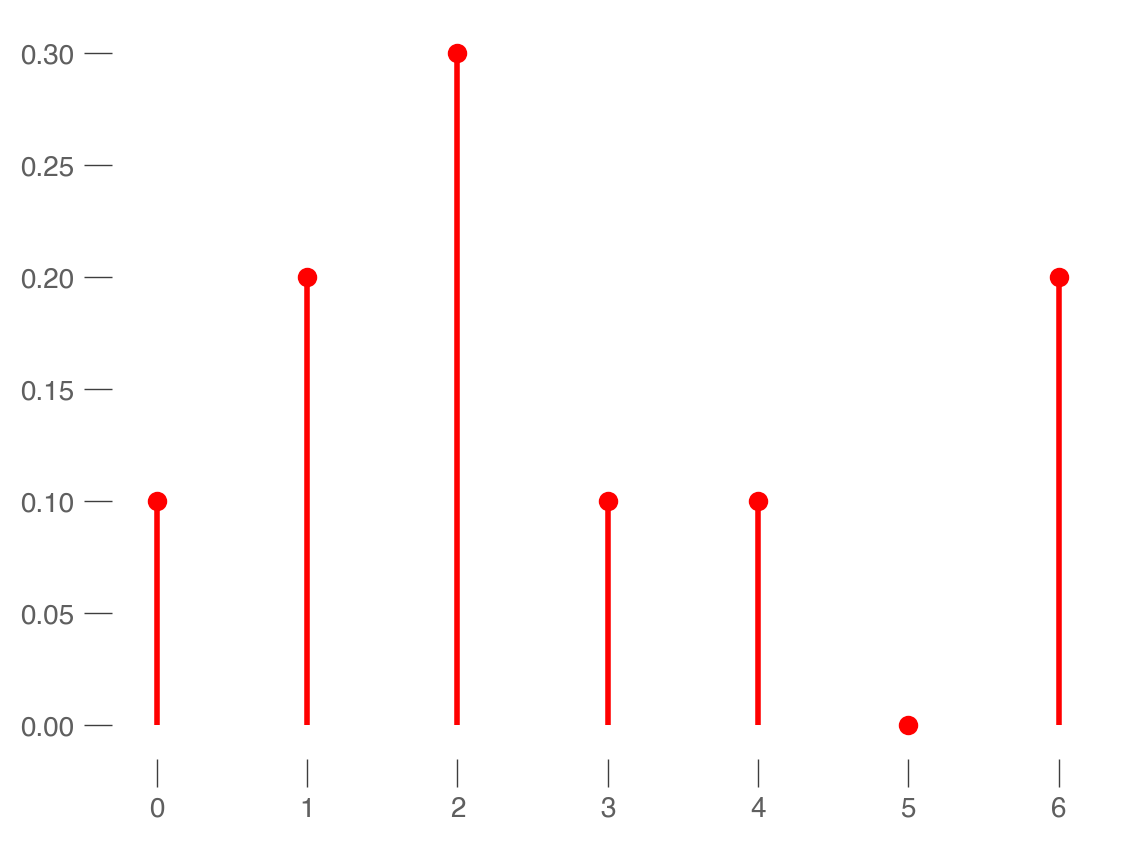

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pmf(x), "ro", ms=6, mec="r")
ax.vlines(x, 0, X.pmf(x), colors="r", lw=2)
plt.show()


Calcolo il valore atteso di $X$ implementando la formula del valore atteso, utilizzando i vettori `x` e `px`.

In [27]:
x_ev = (x * px).sum()
x_ev

2.7

Lo stesso risultato si ottience applicando il metodo `.expect()` all'oggetto `X`.

In [28]:
x_ev = X.expect()
x_ev

2.7

Calcolo ora la varianza di $X$ usando i vettori `x` e `px`.

In [29]:
x_var = ((x - x_ev)**2 * X.pmf(x)).sum()
x_var

3.8100000000000005

Ottengo lo stesso risultato applicando il metodo `.var()` all'oggetto `X`.

In [30]:
X.var()

3.8099999999999987

Calcolo ora la deviazione standard di $X$ prendento la radice quadrata della varianza.

In [31]:
np.sqrt(x_var)

1.9519221295943137

Oppure, in maniera equivalente, applico il metodo `.std()` all'oggetto `X`.

In [32]:
X.std()

1.9519221295943132

## Commenti e considerazioni finali 

L'inferenza bayesiana mira a descrivere la distribuzione a posteriori di variabili casuali che rappresentano i parametri di un modello statistico. Nel capitolo precedente, abbiamo esaminato le caratteristiche principali delle variabili casuali, concentrandoci sul caso discreto. In questo capitolo, abbiamo approfondito le proprietà di una singola variabile casuale. Nel prossimo capitolo, invece, esploreremo il problema di descrivere il verificarsi congiunto di due o più variabili casuali.

## Watermark

In [36]:
%load_ext watermark
%watermark -n -u -v -iv -w 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Aug 19 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

pytensor: 2.14.2

matplotlib: 3.7.1
arviz     : 0.16.1
seaborn   : 0.12.2
numpy     : 1.25.2
scipy     : 1.11.1

Watermark: 2.4.3

